In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
train = pd.read_csv('cleaned_train_df.csv')
test = pd.read_csv('cleaned_test_df.csv')
train.Date = pd.to_datetime(train.Date)
train = train.sort_values(by = 'Date')
train.reset_index(inplace = True)
train = train.drop(['index'], axis = 1)
test.Date = pd.to_datetime(test.Date)
test = test.sort_values(by = 'Date')
test.reset_index(inplace = True)
test = test.drop(['index'], axis = 1)
train

,Date,Bid_Price,Bid_Shares,Ask_Price,Ask_Shares,FeaturePrice1,FeaturePrice2,FeaturePrice3,FeaturePrice4,FeatureShares1,FeatureShares2,TargetPrice
0,2016-04-14,111.58,35,111.59,300,111.59,111.62,111.63,112.0400,263236,22556,111.64
1,2016-04-14,2.78,340,2.79,400,2.78,2.72,2.72,2.8000,146493,-263308,2.77
2,2016-04-14,270.92,15,272.05,35,271.07,270.90,270.90,271.7300,15290,-1774,270.71
3,2016-04-14,3.25,200,3.80,300,3.97,4.46,4.55,3.1000,18403,10427,4.35
4,2016-04-14,0.48,7480,0.50,6942,0.50,0.52,0.55,0.6154,146052,859664,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...
18321,2016-09-14,32.09,300,32.10,900,32.10,32.42,32.49,31.5700,54312,54438,32.12
18322,2016-09-14,79.02,200,94.56,100,81.50,80.79,80.79,81.0000,0,-122,80.79
18323,2016-09-14,10.32,4800,10.35,4800,10.35,10.35,10.95,10.5700,0,6,10.35
18324,2016-09-14,672.00,10,680.00,200,672.00,671.34,671.34,672.2300,1805,-33,672.76


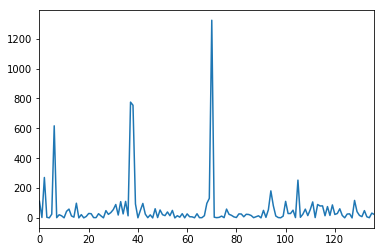

In [4]:
train.TargetPrice[train.Date == '2016-04-14'].plot()

In [438]:
train_y = train[['Date', 'TargetPrice']]
train_x = train.drop(['TargetPrice'], axis = 1)

In [439]:
train_x_by_day = train_x.groupby('Date').agg(['min', 'max', 'sum', 'std', 'mean'])
train_x_by_day.columns = ["_".join(i) for i in train_x_by_day.columns.ravel()]
train_x_by_day = train_x_by_day.reset_index(drop = True)
train_x_by_day  #group to days

,Bid_Price_min,Bid_Price_max,Bid_Price_sum,Bid_Price_std,Bid_Price_mean,Bid_Shares_min,Bid_Shares_max,Bid_Shares_sum,Bid_Shares_std,Bid_Shares_mean,...,FeatureShares1_min,FeatureShares1_max,FeatureShares1_sum,FeatureShares1_std,FeatureShares1_mean,FeatureShares2_min,FeatureShares2_max,FeatureShares2_sum,FeatureShares2_std,FeatureShares2_mean
0,0.01,1318.00,8025.36,154.167671,58.579270,2,160000,632711,20226.714368,4618.328467,...,0,725181,4202945,79892.513426,30678.430657,-628612,859664,-352909,107085.560248,-2575.978102
1,0.01,1330.00,9163.08,145.944396,57.994177,1,152840,399085,12778.973310,2525.854430,...,0,2090437,16619080,299630.623828,105184.050633,-141178,526945,2081228,66493.297794,13172.329114
2,0.01,1327.00,9414.26,129.270404,47.071300,2,111300,378008,8404.890008,1890.040000,...,0,491379,4623135,55152.809832,23115.675000,-344687,157771,-449180,44342.873265,-2245.900000
3,0.01,1355.00,8313.62,139.293512,54.337386,1,99000,413487,9293.958037,2702.529412,...,0,332793,3656891,50815.879335,23901.248366,-56766,84068,63457,18360.538057,414.751634
4,0.01,756.40,6554.44,99.607528,44.588027,4,97300,486228,10857.022490,3307.673469,...,0,479113,3412009,56370.453313,23210.945578,-208168,229303,622205,38909.856286,4232.687075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.00,805.65,7580.52,95.953939,44.855148,0,32201,233201,3551.304858,1379.887574,...,0,406812,3912941,56141.257623,23153.497041,-226984,170834,-19687,39143.861989,-116.491124
103,0.00,780.00,9371.73,104.882522,52.065167,0,83536,478014,10214.853071,2655.633333,...,0,974994,5071761,93181.714681,28176.450000,-257397,236134,-85471,34867.733693,-474.838889
104,0.00,784.50,8814.05,85.276969,41.971667,0,157940,416203,11716.445458,1981.919048,...,0,528110,5077819,57918.980714,24180.090476,-470777,172588,-1629139,48663.424558,-7757.804762
105,0.00,768.25,7199.65,85.356676,38.500802,0,70000,559588,9657.880062,2992.449198,...,0,574924,3986468,61723.053235,21318.010695,-204200,89198,-466103,26877.067164,-2492.529412


In [440]:
test_by_day = test.groupby('Date').agg(['min', 'max', 'sum', 'std', 'mean'])
test_by_day.columns = ["_".join(i) for i in test_by_day.columns.ravel()]

In [441]:
train_y1 = train_y.groupby('Date').TargetPrice.min()
train_y1 = train_y1.reset_index(drop = True)
for_train_y1 = pd.concat([train_x_by_day, train_y1], axis = 1)
for_train_y1.isnull().sum().max() # min y

0

In [442]:
train_y2 = train_y.groupby('Date').TargetPrice.max()
train_y2 = train_y2.reset_index(drop = True)
for_train_y2 = pd.concat([train_x_by_day, train_y2], axis = 1)
for_train_y2.isnull().sum().max() # max y

0

In [443]:
train_y3 = train_y.groupby('Date').TargetPrice.sum()
train_y3 = train_y3.reset_index(drop = True)
for_train_y3 = pd.concat([train_x_by_day, train_y3], axis = 1)
for_train_y3.isnull().sum().max() # sum y

0

In [444]:
train_y4 = train_y.groupby('Date').TargetPrice.std()
train_y4 = train_y4.reset_index(drop = True)
for_train_y4 = pd.concat([train_x_by_day, train_y4], axis = 1)
for_train_y4.isnull().sum().max() # std y

0

In [445]:
train_y5 = train_y.groupby('Date').TargetPrice.mean()
train_y5 = train_y5.reset_index(drop = True)
for_train_y5 = pd.concat([train_x_by_day, train_y5], axis = 1)
for_train_y5.isnull().sum().max() #mean y

0

In [446]:
def calculate_vif(X, print_status, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            if print_status == True:
                print('dropping \'' + X.iloc[:, variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True
    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [447]:
for_train_y1 = calculate_vif(for_train_y1.drop(['TargetPrice'], axis = 1), print_status = True)
for_train_y2 = calculate_vif(for_train_y2.drop(['TargetPrice'], axis = 1), print_status = False)
for_train_y3 = calculate_vif(for_train_y3.drop(['TargetPrice'], axis = 1), print_status = False)
for_train_y4 = calculate_vif(for_train_y4.drop(['TargetPrice'], axis = 1), print_status = False)
for_train_y5 = calculate_vif(for_train_y5.drop(['TargetPrice'], axis = 1), print_status = False)

# Filter features

dropping 'FeaturePrice1_mean' at index: 24
dropping 'FeaturePrice2_max' at index: 25
dropping 'FeaturePrice1_std' at index: 23
dropping 'FeaturePrice2_sum' at index: 24
dropping 'Bid_Price_max' at index: 1
dropping 'Bid_Price_mean' at index: 3
dropping 'FeaturePrice2_std' at index: 22
dropping 'FeaturePrice1_sum' at index: 20
dropping 'FeaturePrice4_mean' at index: 31
dropping 'FeaturePrice3_sum' at index: 24
dropping 'Bid_Price_std' at index: 2
dropping 'Ask_Price_sum' at index: 9
dropping 'FeaturePrice3_max' at index: 21
dropping 'Bid_Price_sum' at index: 1
dropping 'FeaturePrice4_std' at index: 25
dropping 'Ask_Price_mean' at index: 9
dropping 'FeaturePrice2_mean' at index: 17
dropping 'FeaturePrice3_std' at index: 18
dropping 'Ask_Shares_mean' at index: 13
dropping 'FeaturePrice4_sum' at index: 20
dropping 'Bid_Shares_std' at index: 4
dropping 'FeatureShares1_std' at index: 22
dropping 'FeaturePrice1_max' at index: 13
dropping 'Ask_Shares_std' at index: 11
dropping 'Ask_Price_std' 

In [448]:
pca_columns = set(train_x_by_day.columns) - set(for_train_y1.columns)
pca_columns = list(pca_columns)
pca_columns

#Decompose corr features

['Bid_Shares_sum',
 'Bid_Price_mean',
 'Bid_Price_sum',
 'FeaturePrice4_min',
 'FeaturePrice2_sum',
 'FeaturePrice3_mean',
 'FeaturePrice3_sum',
 'Ask_Price_std',
 'FeatureShares2_std',
 'FeaturePrice1_max',
 'Bid_Shares_std',
 'FeaturePrice1_mean',
 'Ask_Shares_sum',
 'FeaturePrice2_std',
 'FeaturePrice1_std',
 'FeatureShares1_mean',
 'FeatureShares2_mean',
 'FeaturePrice2_mean',
 'Ask_Price_sum',
 'Ask_Price_mean',
 'Bid_Price_max',
 'FeaturePrice3_max',
 'FeatureShares1_std',
 'Ask_Price_max',
 'Bid_Price_std',
 'FeaturePrice4_max',
 'Ask_Shares_mean',
 'Bid_Shares_mean',
 'FeaturePrice3_std',
 'FeatureShares1_sum',
 'FeaturePrice4_std',
 'FeaturePrice1_min',
 'FeaturePrice2_max',
 'FeaturePrice1_sum',
 'Ask_Shares_std',
 'FeaturePrice4_sum',
 'FeaturePrice4_mean']

In [449]:
app_data = []
for i in pca_columns:
    app_data.append(train_x_by_day[i])
pca_train_x = pd.DataFrame(app_data)
pca_train_x = pca_train_x.T
pca_train_x

,Bid_Shares_sum,Bid_Price_mean,Bid_Price_sum,FeaturePrice4_min,FeaturePrice2_sum,FeaturePrice3_mean,FeaturePrice3_sum,Ask_Price_std,FeatureShares2_std,FeaturePrice1_max,...,Bid_Shares_mean,FeaturePrice3_std,FeatureShares1_sum,FeaturePrice4_std,FeaturePrice1_min,FeaturePrice2_max,FeaturePrice1_sum,Ask_Shares_std,FeaturePrice4_sum,FeaturePrice4_mean
0,632711.0,58.579270,8025.36,0.1200,8110.4377,58.153882,7967.0819,154.559939,107085.560248,1322.88,...,4618.328467,154.812121,4202945.0,153.986341,0.1200,1324.18,8107.0239,5955.933784,8092.6181,59.070205
1,399085.0,57.994177,9163.08,0.0750,9460.1680,59.813032,9450.4590,146.150121,66493.297794,1333.00,...,2525.854430,146.845630,16619080.0,146.435772,0.0705,1338.80,9441.1220,11452.631087,9424.6236,59.649516
2,378008.0,47.071300,9414.26,0.0800,9772.7857,48.083445,9616.6891,170.410286,44342.873265,1328.89,...,1890.040000,129.769576,4623135.0,129.750846,0.0706,1328.89,9770.9389,12722.365540,9758.3184,48.791592
3,413487.0,54.337386,8313.62,0.0800,8441.4554,54.158394,8286.2343,139.492647,18360.538057,1360.00,...,2702.529412,139.779050,3656891.0,139.113168,0.0820,1360.20,8440.6910,15829.856977,8412.9223,54.986420
4,486228.0,44.588027,6554.44,0.1000,6663.2702,43.481097,6391.7213,99.599326,38909.856286,756.98,...,3307.673469,100.688918,3412009.0,98.906441,0.1000,757.26,6656.4231,4963.746795,6623.9936,45.061181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,233201.0,44.855148,7580.52,0.0800,7633.5561,46.485406,7856.0336,98.811133,39143.861989,804.86,...,1379.887574,98.258723,3912941.0,96.220588,0.0800,804.68,7632.4651,5645.879908,7661.9206,45.336808
103,478014.0,52.065167,9371.73,0.1835,9457.8820,53.832847,9689.9124,106.467774,34867.733693,780.00,...,2655.633333,106.472774,5071761.0,105.480597,0.1688,779.50,9464.3451,9300.450868,9511.1824,52.839902
104,416203.0,41.971667,8814.05,0.1229,8904.3824,43.206571,9073.3800,85.385218,48663.424558,784.50,...,1981.919048,87.320819,5077819.0,85.665603,0.1200,784.29,8913.4406,5205.484854,8935.4855,42.549931
105,559588.0,38.500802,7199.65,0.1300,7303.2786,39.225562,7335.1801,144.109837,26877.067164,768.68,...,2992.449198,85.522189,3986468.0,85.730381,0.0100,768.68,7303.3638,11428.760131,7359.4255,39.355217


In [450]:
pca = PCA(n_components = 10)
scaler_train_x = StandardScaler().fit_transform(pca_train_x)
up_pca_train_x = pd.DataFrame(pca.fit_transform(scaler_train_x))
up_pca_train_x

,0,1,2,3,4,5,6,7,8,9
0,-4.197081,-2.639334,0.189970,-2.041514,1.830440,0.065440,0.848874,1.144117,1.044700,-0.566416
1,-5.163493,2.820015,-0.307096,-2.352709,6.149481,2.961916,-0.645405,-0.046236,-2.509562,-0.265630
2,-2.677831,-1.344058,-0.894523,2.581629,0.661533,0.390333,-0.740597,0.071187,-0.385667,-0.411833
3,-2.852443,-2.225355,0.606539,0.053471,-0.100247,1.092623,-1.470765,-0.152907,-0.679593,0.583574
4,5.023714,-1.474130,-0.441847,-0.276649,0.865768,-0.312057,0.021880,0.638121,-0.817092,-0.286542
...,...,...,...,...,...,...,...,...,...,...
102,4.187783,-0.629889,-1.636684,0.661792,0.773669,-0.650792,-0.971033,0.521510,-0.571186,0.187046
103,1.217589,1.887604,-1.488803,-0.942903,-0.656053,-1.119355,0.027306,-0.301366,-0.492912,-0.158277
104,4.707108,1.076506,-1.689340,2.120397,0.490523,-1.245541,0.199197,-0.325700,0.169977,0.023460
105,4.896506,-0.915738,-0.006442,2.549092,0.922650,-0.024027,-0.510292,-0.172695,-0.735231,-0.104355


In [451]:
for_train_y1_full = pd.concat([for_train_y1, up_pca_train_x], axis = 1)
for_train_y2_full = pd.concat([for_train_y2, up_pca_train_x], axis = 1)
for_train_y3_full = pd.concat([for_train_y3, up_pca_train_x], axis = 1)
for_train_y4_full = pd.concat([for_train_y4, up_pca_train_x], axis = 1)
for_train_y5_full = pd.concat([for_train_y5, up_pca_train_x], axis = 1)

In [452]:
for_train_y1_full = calculate_vif(for_train_y1_full, print_status = True)
for_train_y2_full = calculate_vif(for_train_y2_full, print_status = False)
for_train_y3_full = calculate_vif(for_train_y3_full, print_status = False)
for_train_y4_full = calculate_vif(for_train_y4_full, print_status = False)
for_train_y5_full = calculate_vif(for_train_y5_full, print_status = False)

# Another Filter

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


dropping 'FeatureShares2_sum' at index: 12
dropping 'Bid_Shares_max' at index: 2
dropping 'FeaturePrice2_min' at index: 5
dropping 'Ask_Shares_max' at index: 4
dropping 'FeatureShares1_max' at index: 6
Remaining variables:
Index([     'Bid_Price_min',     'Bid_Shares_min',      'Ask_Price_min',
           'Ask_Shares_min',  'FeaturePrice3_min', 'FeatureShares1_min',
       'FeatureShares2_min', 'FeatureShares2_max',                    0,
                          1,                    2,                    3,
                          4,                    5,                    6,
                          7,                    8,                    9],
      dtype='object')
Remaining variables:
Index([     'Bid_Price_min',     'Bid_Shares_min',      'Ask_Price_min',
           'Ask_Shares_min',  'FeaturePrice3_min', 'FeatureShares1_min',
       'FeatureShares2_min', 'FeatureShares2_max',                    0,
                          1,                    2,                    3,
   

In [453]:
def normalize(df):
    for i in df.columns:
        df[i] = (df[i] - min(df[i])) / (max(df[i]) - min(df[i]))
    return df

# thats means - all features will be in interval [0;1] (greater )

In [454]:
for_train_y1_full = normalize(for_train_y1_full)
for_train_y2_full = normalize(for_train_y2_full)
for_train_y3_full = normalize(for_train_y3_full)
for_train_y4_full = normalize(for_train_y4_full)
for_train_y5_full = normalize(for_train_y5_full)

In [455]:
for_train_y1_full = for_train_y1_full.drop(['FeaturePrice3_min','FeatureShares1_min'], axis = 1)
for_train_y2_full = for_train_y2_full.drop(['FeaturePrice3_min','FeatureShares1_min'], axis = 1)
for_train_y3_full = for_train_y3_full.drop(['FeaturePrice3_min','FeatureShares1_min'], axis = 1)
for_train_y4_full = for_train_y4_full.drop(['FeaturePrice3_min','FeatureShares1_min'], axis = 1)
for_train_y5_full = for_train_y5_full.drop(['FeaturePrice3_min','FeatureShares1_min'], axis = 1)

In [456]:
for_train_y1_full.isnull().sum()

Bid_Price_min         0
Bid_Shares_min        0
Ask_Price_min         0
Ask_Shares_min        0
FeatureShares2_min    0
FeatureShares2_max    0
0                     0
1                     0
2                     0
3                     0
4                     0
5                     0
6                     0
7                     0
8                     0
9                     0
dtype: int64

In [457]:
finished_for_y1 = pd.concat([for_train_y1_full, train_y1], axis = 1)
finished_for_y2 = pd.concat([for_train_y2_full, train_y2], axis = 1)
finished_for_y3 = pd.concat([for_train_y3_full, train_y3], axis = 1)
finished_for_y4 = pd.concat([for_train_y4_full, train_y4], axis = 1)
finished_for_y5 = pd.concat([for_train_y5_full, train_y5], axis = 1)

In [459]:
finished_for_y1

,Bid_Price_min,Bid_Shares_min,Ask_Price_min,Ask_Shares_min,FeatureShares2_min,FeatureShares2_max,0,1,2,3,4,5,6,7,8,9,TargetPrice
0,0.076923,0.2,0.000000,0.000000,0.748786,0.425601,0.158116,0.122037,0.350064,0.201369,0.535674,0.387165,0.516612,0.494107,0.586903,0.208636,0.1200
1,0.076923,0.1,0.285714,0.166667,0.954983,0.252514,0.092465,0.573556,0.311882,0.174665,0.962478,0.715897,0.269718,0.344873,0.000000,0.316309,0.0700
2,0.076923,0.2,0.257143,0.500000,0.868894,0.060462,0.261322,0.229164,0.266760,0.598083,0.420163,0.424039,0.253990,0.359595,0.350712,0.263972,0.0700
3,0.076923,0.1,0.257143,0.166667,0.990692,0.022120,0.249460,0.156275,0.382062,0.381140,0.344885,0.503744,0.133347,0.331500,0.302176,0.620300,0.0800
4,0.076923,0.4,0.285714,0.333333,0.926645,0.097675,0.784507,0.218406,0.301532,0.352813,0.440346,0.344322,0.379971,0.430671,0.279472,0.308823,0.1050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.000000,0.0,0.000000,0.000000,0.918685,0.067258,0.727720,0.288229,0.209752,0.433341,0.431245,0.305877,0.215916,0.416051,0.320077,0.478354,0.0800
103,0.000000,0.0,0.000000,0.000000,0.905820,0.101228,0.525947,0.496440,0.221111,0.295641,0.289961,0.252699,0.380868,0.312888,0.333002,0.354738,0.1900
104,0.000000,0.0,0.000000,0.000000,0.815555,0.068170,0.762999,0.429358,0.205708,0.558504,0.403264,0.238377,0.409269,0.309837,0.442463,0.419795,0.1200
105,0.000000,0.0,0.000000,0.000000,0.928323,0.024789,0.775865,0.264588,0.334976,0.595291,0.445967,0.377011,0.292042,0.329019,0.292989,0.374041,0.1500


In [460]:
finished_for_y1.to_csv('train_for_y1.csv', index = False)
finished_for_y2.to_csv('train_for_y2.csv', index = False)
finished_for_y3.to_csv('train_for_y3.csv', index = False)
finished_for_y4.to_csv('train_for_y4.csv', index = False)
finished_for_y5.to_csv('train_for_y5.csv', index = False)

In [461]:
test_by_day = test_by_day.reset_index(drop = True)
test_by_day

,Bid_Price_min,Bid_Price_max,Bid_Price_sum,Bid_Price_std,Bid_Price_mean,Bid_Shares_min,Bid_Shares_max,Bid_Shares_sum,Bid_Shares_std,Bid_Shares_mean,...,FeatureShares1_min,FeatureShares1_max,FeatureShares1_sum,FeatureShares1_std,FeatureShares1_mean,FeatureShares2_min,FeatureShares2_max,FeatureShares2_sum,FeatureShares2_std,FeatureShares2_mean
0,0.00,1429.00,7575.18,124.604912,48.872129,0,2584700,2941585,207661.686877,18977.967742,...,0,626338,3298040,65639.565864,21277.677419,-751101,160203,-930980,67483.021471,-6006.322581
1,0.00,400.00,7855.45,45.824249,33.859698,0,1584700,1876877,104035.433651,8089.987069,...,0,7335035,37067348,592470.468761,159773.051724,-918338,428286,-1131582,92778.575843,-4877.508621
2,0.00,801.10,8166.45,85.130488,38.160981,0,250000,670710,18276.674828,3134.158879,...,0,423684,4104388,53940.460121,19179.383178,-318084,550198,562943,54725.393745,2630.574766
3,0.00,797.00,7112.01,91.158774,40.180847,0,145000,535079,12351.544096,3023.045198,...,0,395469,3465510,49477.694043,19579.152542,-100507,271464,498839,35665.992249,2818.299435
4,0.00,801.55,10277.72,105.393038,50.879802,0,63000,468269,7239.621786,2318.163366,...,0,287885,4064691,40135.222130,20122.232673,-698373,138460,-417169,53544.193942,-2065.193069
5,0.00,1469.00,9572.95,139.991305,52.026902,0,318752,945994,27518.958714,5141.271739,...,0,364480,4135633,55523.291701,22476.266304,-200808,159064,-202371,28465.726788,-1099.842391
6,0.00,814.00,7708.26,113.920233,48.786456,0,45900,247972,5085.209608,1569.443038,...,0,544854,5450941,86826.961804,34499.626582,-181899,210756,126676,40632.661852,801.746835
7,0.00,811.50,8456.51,89.617071,42.282550,0,2590000,3203578,183324.810714,16017.890000,...,0,341622,4345709,52517.135488,21728.545000,-1009200,111221,-1613850,75892.824685,-8069.250000
8,0.00,802.10,7216.71,93.554934,43.474157,0,84400,390155,9811.490866,2350.331325,...,0,286198,2932659,42011.585417,17666.620482,-45382,166933,608543,20851.437194,3665.921687
9,0.00,816.37,8378.05,110.988730,47.874571,0,113700,381151,9476.219276,2178.005714,...,0,342184,4171271,54944.837206,23835.834286,-227347,39263,-513146,23497.157782,-2932.262857


In [462]:
cols_not_corr = ['Bid_Price_min', 'Bid_Shares_min', 'Bid_Shares_max', 'Ask_Price_min',
                 'Ask_Shares_min', 'Ask_Shares_max', 'FeaturePrice2_min',
                 'FeaturePrice3_min', 'FeatureShares1_min', 'FeatureShares1_max',
                 'FeatureShares2_min', 'FeatureShares2_max', 'FeatureShares2_sum']

In [463]:
app_data = []
for i in cols_not_corr:
    app_data.append(test_by_day[i])
test_by_day_not_corr = pd.DataFrame(app_data)
test_by_day_not_corr = test_by_day_not_corr.T
test_by_day_not_corr

,Bid_Price_min,Bid_Shares_min,Bid_Shares_max,Ask_Price_min,Ask_Shares_min,Ask_Shares_max,FeaturePrice2_min,FeaturePrice3_min,FeatureShares1_min,FeatureShares1_max,FeatureShares2_min,FeatureShares2_max,FeatureShares2_sum
0,0.00,0.0,2584700.0,0.00,0.0,80000.0,0.0130,0.0,0.0,626338.0,-751101.0,160203.0,-930980.0
1,0.00,0.0,1584700.0,0.00,0.0,121570.0,0.0120,0.0,0.0,7335035.0,-918338.0,428286.0,-1131582.0
2,0.00,0.0,250000.0,0.00,0.0,77119.0,0.0700,0.0,0.0,423684.0,-318084.0,550198.0,562943.0
3,0.00,0.0,145000.0,0.00,0.0,137000.0,0.1499,0.0,0.0,395469.0,-100507.0,271464.0,498839.0
4,0.00,0.0,63000.0,0.00,0.0,111466.0,0.1469,0.0,0.0,287885.0,-698373.0,138460.0,-417169.0
5,0.00,0.0,318752.0,0.00,0.0,339456.0,0.1400,0.0,0.0,364480.0,-200808.0,159064.0,-202371.0
6,0.00,0.0,45900.0,0.00,0.0,151100.0,0.0800,0.0,0.0,544854.0,-181899.0,210756.0,126676.0
7,0.00,0.0,2590000.0,0.00,0.0,107100.0,0.0100,0.0,0.0,341622.0,-1009200.0,111221.0,-1613850.0
8,0.00,0.0,84400.0,0.00,0.0,82300.0,0.1540,0.0,0.0,286198.0,-45382.0,166933.0,608543.0
9,0.00,0.0,113700.0,0.00,0.0,80000.0,0.1670,0.0,0.0,342184.0,-227347.0,39263.0,-513146.0


In [464]:
test_by_day_not_corr.shape

(22, 13)

In [465]:
app_data = []
for i in pca_columns:
    app_data.append(test_by_day[i])
pca_test = pd.DataFrame(app_data)
pca_test = pca_test.T
pca_test

,Bid_Shares_sum,Bid_Price_mean,Bid_Price_sum,FeaturePrice4_min,FeaturePrice2_sum,FeaturePrice3_mean,FeaturePrice3_sum,Ask_Price_std,FeatureShares2_std,FeaturePrice1_max,...,Bid_Shares_mean,FeaturePrice3_std,FeatureShares1_sum,FeaturePrice4_std,FeaturePrice1_min,FeaturePrice2_max,FeaturePrice1_sum,Ask_Shares_std,FeaturePrice4_sum,FeaturePrice4_mean
0,2941585.0,48.872129,7575.18,0.0095,7697.9754,51.619061,8000.9545,125.835395,67483.021471,1431.22,...,18977.967742,126.321648,3298040.0,124.579723,0.0130,1431.99,7697.215800,8091.578938,7654.3688,49.383025
1,1876877.0,33.859698,7855.45,0.0100,8372.9645,35.561567,8250.2835,389.128210,92778.575843,402.50,...,8089.987069,47.040411,37067348.0,46.678629,0.0120,404.83,8353.444300,10769.869493,8311.3585,35.824821
2,670710.0,38.160981,8166.45,0.0725,8392.7595,38.428424,8223.6827,421.803319,54725.393745,801.56,...,3134.158879,85.361641,4104388.0,84.774147,0.0700,800.25,8389.003100,8068.935435,8312.2568,38.842321
3,535079.0,40.180847,7112.01,0.1382,7338.6160,1170.382856,207157.7656,350.264670,35665.992249,798.21,...,3023.045198,15030.146012,3465510.0,91.416354,0.1449,799.79,7336.416500,12426.865345,7247.5213,40.946448
4,468269.0,50.879802,10277.72,0.1382,10502.0454,51.706968,10444.8075,235.089658,53544.193942,801.55,...,2318.163366,106.559420,4064691.0,106.081354,0.1460,801.50,10487.655200,10048.350558,10438.1537,51.674028
5,945994.0,52.026902,9572.95,0.1343,209792.5933,1141.622076,210058.4620,287.490729,28465.726788,1469.00,...,5141.271739,14740.818378,4135633.0,139.428363,0.1398,199999.99,9915.217217,28388.054500,9694.3847,52.686873
6,247972.0,48.786456,7708.26,0.0900,7754.1826,50.871019,8037.6210,227.144125,40632.661852,814.49,...,1569.443038,115.712650,5450941.0,114.215048,0.0800,815.00,7758.357600,16494.856082,7787.9119,49.290582
7,3203578.0,42.282550,8456.51,0.0115,8618.5980,43.815973,8763.1945,159.206398,75892.824685,811.40,...,16017.890000,91.481265,4345709.0,90.009648,0.0100,809.85,8620.157600,11603.424343,8639.2102,43.196051
8,390155.0,43.474157,7216.71,0.1480,7376.9027,45.443344,7543.5951,252.799289,20851.437194,802.50,...,2350.331325,95.876017,2932659.0,93.322985,0.1530,803.65,7358.953400,7891.953610,7292.4569,43.930463
9,381151.0,47.874571,8378.05,0.1605,8553.3290,50.754537,8882.0439,263.486503,23497.157782,816.45,...,2178.005714,112.617373,4171271.0,111.150640,0.1670,818.00,8551.036500,7833.957491,8563.6005,48.934860


In [466]:
pca = PCA(n_components = 10)
scaler_test = StandardScaler().fit_transform(pca_test)
up_pca_test = pd.DataFrame(pca.fit_transform(scaler_test))
up_pca_test

,0,1,2,3,4,5,6,7,8,9
0,0.074078,-3.974101,2.161500,-0.216626,0.502690,-1.471048,1.575825,-0.784846,1.387618,-0.361421
1,-7.269630,5.930301,5.491984,-0.946344,0.482143,1.593954,0.768752,-1.997440,-0.292468,-0.106334
2,-2.447234,3.536787,-0.071276,-0.958131,-0.419986,-2.153589,0.668225,2.398230,-0.457542,0.763060
3,-0.768460,3.618819,-2.391826,1.868773,2.195710,-0.270116,1.487968,1.481677,0.385253,-0.497349
4,0.827414,1.351714,-0.361625,-2.727458,-1.260876,1.306425,-1.781324,1.434661,0.906868,-0.117588
5,8.734032,3.708338,2.062979,4.797567,-1.840284,-0.701798,-1.186745,-0.842704,0.460799,-0.556954
6,-0.613281,0.398687,-1.057009,0.249380,-1.850300,1.068704,1.155401,0.432537,-0.228258,-0.082799
7,-2.402288,-1.538310,2.777129,0.527754,0.312036,0.065968,-1.056354,1.173888,1.771917,0.536463
8,-1.994192,1.279350,-3.178526,-0.332360,-0.761228,-1.317635,0.272798,-0.115358,-0.005947,-0.738919
9,-0.167790,1.228085,-1.908687,-1.766647,-0.928560,-0.135679,-0.354232,0.277462,0.398042,-0.394484


In [467]:
for_test_full = pd.concat([test_by_day_not_corr, up_pca_test], axis = 1)

In [468]:
corr2_cols = ['Bid_Price_min','Bid_Shares_min','Ask_Price_min',
              'Ask_Shares_min','FeaturePrice3_min','FeatureShares1_min',
              'FeatureShares2_min','FeatureShares2_max',0,1,2,3,4,5,6,7,8,9]

app_data = []
for i in corr2_cols:
    app_data.append(for_test_full[i])
for_test_full = pd.DataFrame(app_data)
for_test_full = for_test_full.T
for_test_full

,Bid_Price_min,Bid_Shares_min,Ask_Price_min,Ask_Shares_min,FeaturePrice3_min,FeatureShares1_min,FeatureShares2_min,FeatureShares2_max,0,1,2,3,4,5,6,7,8,9
0,0.00,0.0,0.00,0.0,0.0,0.0,-751101.0,160203.0,0.074078,-3.974101,2.161500,-0.216626,0.502690,-1.471048,1.575825,-0.784846,1.387618,-0.361421
1,0.00,0.0,0.00,0.0,0.0,0.0,-918338.0,428286.0,-7.269630,5.930301,5.491984,-0.946344,0.482143,1.593954,0.768752,-1.997440,-0.292468,-0.106334
2,0.00,0.0,0.00,0.0,0.0,0.0,-318084.0,550198.0,-2.447234,3.536787,-0.071276,-0.958131,-0.419986,-2.153589,0.668225,2.398230,-0.457542,0.763060
3,0.00,0.0,0.00,0.0,0.0,0.0,-100507.0,271464.0,-0.768460,3.618819,-2.391826,1.868773,2.195710,-0.270116,1.487968,1.481677,0.385253,-0.497349
4,0.00,0.0,0.00,0.0,0.0,0.0,-698373.0,138460.0,0.827414,1.351714,-0.361625,-2.727458,-1.260876,1.306425,-1.781324,1.434661,0.906868,-0.117588
5,0.00,0.0,0.00,0.0,0.0,0.0,-200808.0,159064.0,8.734032,3.708338,2.062979,4.797567,-1.840284,-0.701798,-1.186745,-0.842704,0.460799,-0.556954
6,0.00,0.0,0.00,0.0,0.0,0.0,-181899.0,210756.0,-0.613281,0.398687,-1.057009,0.249380,-1.850300,1.068704,1.155401,0.432537,-0.228258,-0.082799
7,0.00,0.0,0.00,0.0,0.0,0.0,-1009200.0,111221.0,-2.402288,-1.538310,2.777129,0.527754,0.312036,0.065968,-1.056354,1.173888,1.771917,0.536463
8,0.00,0.0,0.00,0.0,0.0,0.0,-45382.0,166933.0,-1.994192,1.279350,-3.178526,-0.332360,-0.761228,-1.317635,0.272798,-0.115358,-0.005947,-0.738919
9,0.00,0.0,0.00,0.0,0.0,0.0,-227347.0,39263.0,-0.167790,1.228085,-1.908687,-1.766647,-0.928560,-0.135679,-0.354232,0.277462,0.398042,-0.394484


In [469]:
for_test_full = normalize(for_test_full)
for_test_full = for_test_full.drop(['FeaturePrice3_min','FeatureShares1_min'], axis = 1)
for_test_full

,Bid_Price_min,Bid_Shares_min,Ask_Price_min,Ask_Shares_min,FeatureShares2_min,FeatureShares2_max,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.267788,0.236703,0.458877,0.000000,0.639764,0.400081,0.377027,0.151562,0.808862,0.275861,0.864112,0.239271
1,0.0,0.0,0.0,0.0,0.094273,0.761394,0.000000,1.000000,1.000000,0.312774,0.373836,0.832163,0.616691,0.000000,0.270035,0.374670
2,0.0,0.0,0.0,0.0,0.717061,1.000000,0.301331,0.758338,0.398259,0.311364,0.233714,0.000000,0.592755,1.000000,0.211665,0.836142
3,0.0,0.0,0.0,0.0,0.942806,0.454463,0.406230,0.766621,0.147261,0.649587,0.639992,0.418236,0.787942,0.791487,0.509677,0.167120
4,0.0,0.0,0.0,0.0,0.322496,0.194148,0.505949,0.537722,0.366854,0.099674,0.103105,0.768316,0.009497,0.780791,0.694119,0.368696
5,0.0,0.0,0.0,0.0,0.838739,0.234474,1.000000,0.775659,0.629107,1.000000,0.013109,0.322379,0.151071,0.262699,0.536390,0.135482
6,0.0,0.0,0.0,0.0,0.858358,0.335645,0.415927,0.441499,0.291639,0.455835,0.011554,0.715529,0.708755,0.552811,0.292740,0.387162
7,0.0,0.0,0.0,0.0,0.000000,0.140836,0.304139,0.245930,0.706352,0.489141,0.347414,0.492865,0.182118,0.721466,1.000000,0.715865
8,0.0,0.0,0.0,0.0,1.000000,0.249875,0.329639,0.530416,0.062169,0.386234,0.180711,0.185628,0.498600,0.428167,0.371349,0.038896
9,0.0,0.0,0.0,0.0,0.811204,0.000000,0.443763,0.525240,0.199519,0.214629,0.154721,0.448088,0.349299,0.517532,0.514199,0.221721


In [470]:
for_test_full.shape

(22, 16)

In [471]:
for_test_full.to_csv('test_finished.csv', index = False)